In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_colwidth', 200)


In [6]:
# Load dataset
data_path = "../data/raw/phishing_site_urls.csv"
df = pd.read_csv(data_path)

# Basic info
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (549346, 2)


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/,bad
3,mail.printakid.com/www.online.americanexpress.com/index.html,bad
4,thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/,bad


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


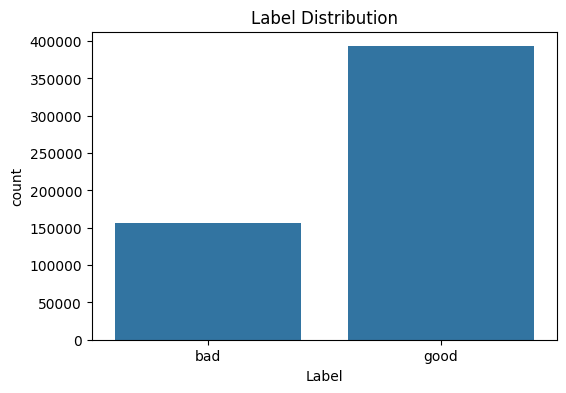

In [9]:
df['Label'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df)
plt.title("Label Distribution")
plt.show()



In [11]:
duplicate_count = df.duplicated().sum()
print("Duplicate URLs:", duplicate_count)
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Duplicate URLs: 42150
Shape after removing duplicates: (507196, 2)


In [16]:
df['label_numeric'] = df['Label'].map({
    'good': 0,
    'bad': 1
})

df[['Label', 'label_numeric']].head()


,Label,label_numeric
0,bad,1
1,bad,1
2,bad,1
3,bad,1
4,bad,1


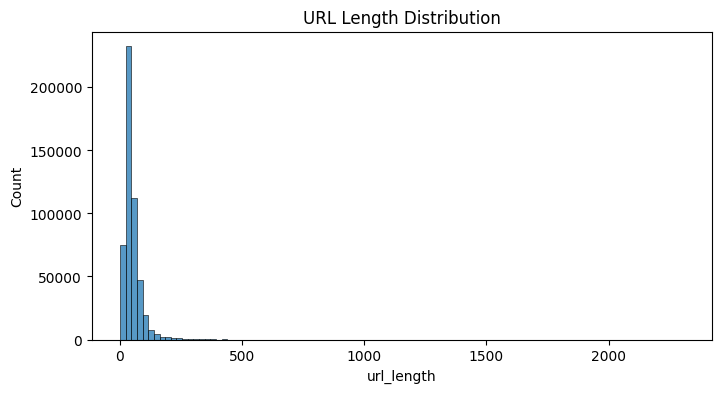

In [17]:
df['url_length'] = df['URL'].apply(len)

df['url_length'].describe()
plt.figure(figsize=(8,4))
sns.histplot(df['url_length'], bins=100)
plt.title("URL Length Distribution")
plt.show()



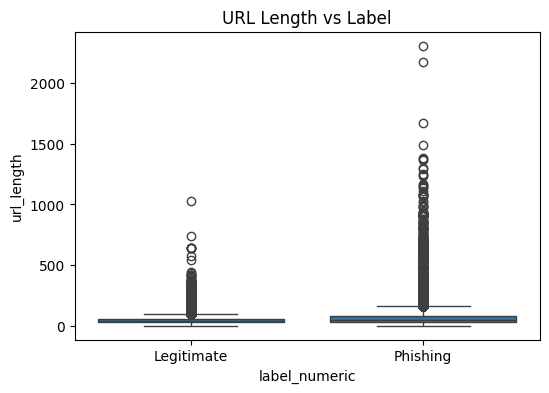

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='label_numeric', y='url_length', data=df)
plt.xticks([0,1], ['Legitimate', 'Phishing'])
plt.title("URL Length vs Label")
plt.show()


In [20]:
clean_path = "../data/processed/clean_urls.csv"
df.to_csv(clean_path, index=False)

print("Cleaned data saved to:", clean_path)


Cleaned data saved to: ../data/processed/clean_urls.csv


In [21]:
df.shape
df['label_numeric'].value_counts()


label_numeric
0    392897
1    114299
Name: count, dtype: int64